In [15]:
#imports 
import numpy as np
import pandas as pd
from math import sqrt 
from pprint import pprint
from numpy import array
from time import time

In [16]:
# load data
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
data = fetch_olivetti_faces()
X = data.images
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
# reshape data
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [18]:
# new train shape
X_train.shape

(280, 4096)

In [19]:
# new test shape
X_test.shape

(120, 4096)

In [20]:
# DeepExtratrees 
import argparse
import numpy as np
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/olivetti.json")   
gc = GCForest(config)

In [21]:
# count of class
len(np.unique(y_train))

40

In [22]:
    # X_enc is the concatenated predict_proba result of DeepExtratrees
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
  

[ 2018-07-27 21:55:32,281][cascade_classifier.fit_transform] X_groups_train.shape=[(280, 4096)],y_train.shape=(280,),X_groups_test.shape=[(120, 4096)],y_test.shape=(120,)
[ 2018-07-27 21:55:32,284][cascade_classifier.fit_transform] group_dims=[4096]
[ 2018-07-27 21:55:32,284][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:55:32,285][cascade_classifier.fit_transform] group_ends=[4096]
[ 2018-07-27 21:55:32,286][cascade_classifier.fit_transform] X_train.shape=(280, 4096),X_test.shape=(120, 4096)
[ 2018-07-27 21:55:32,289][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(280, 4096), X_cur_test.shape=(120, 4096)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[ 2018-07-27 21:55:32,828][kfold_wrapper.log_e

In [23]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtratrees = {:.6f} %".format(acc * 100))

[ 2018-07-27 21:55:38,388][cascade_classifier.transform] X_groups_test.shape=[(120, 4096)]
[ 2018-07-27 21:55:38,389][cascade_classifier.transform] group_dims=[4096]
[ 2018-07-27 21:55:38,391][cascade_classifier.transform] X_test.shape=(120, 4096)
[ 2018-07-27 21:55:38,393][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(120, 4096)


Test Accuracy of DeepExtratrees = 96.666667 %


In [24]:
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      0.75      0.86         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       0.67      1.00      0.80         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
         14       1.00      1.00      1.00         5
         15       1.0

In [25]:
# Make data + estimators.
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-27 21:56:51,195][cascade_classifier.transform] X_groups_test.shape=[(120, 4096)]
[ 2018-07-27 21:56:51,197][cascade_classifier.transform] group_dims=[4096]
[ 2018-07-27 21:56:51,198][cascade_classifier.transform] X_test.shape=(120, 4096)
[ 2018-07-27 21:56:51,199][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(120, 4096)


In [26]:
X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-27 21:56:53,278][cascade_classifier.fit_transform] X_groups_train.shape=[(280, 4136)],y_train.shape=(280,),X_groups_test.shape=[(120, 4136)],y_test.shape=(120,)
[ 2018-07-27 21:56:53,281][cascade_classifier.fit_transform] group_dims=[4136]
[ 2018-07-27 21:56:53,282][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:56:53,283][cascade_classifier.fit_transform] group_ends=[4136]
[ 2018-07-27 21:56:53,284][cascade_classifier.fit_transform] X_train.shape=(280, 4136),X_test.shape=(120, 4136)
[ 2018-07-27 21:56:53,288][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(280, 4136), X_cur_test.shape=(120, 4136)
[ 2018-07-27 21:56:53,923][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=84.62%
[ 2018-07-27 21:56:54,977][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:56:55,723][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - esti

In [27]:
# predict  data + Es
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtraTrees = {:.6f} %".format(acc * 100))

[ 2018-07-27 21:57:00,867][cascade_classifier.transform] X_groups_test.shape=[(120, 4136)]
[ 2018-07-27 21:57:00,869][cascade_classifier.transform] group_dims=[4136]
[ 2018-07-27 21:57:00,870][cascade_classifier.transform] X_test.shape=(120, 4136)
[ 2018-07-27 21:57:00,871][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(120, 4136)


Test Accuracy of DeepExtraTrees = 95.833333 %


In [28]:
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      0.75      0.86         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       0.67      1.00      0.80         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
         14       1.00      1.00      1.00         5
         15       1.0

In [29]:
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")

[ 2018-07-27 21:57:02,081][cascade_classifier.fit_transform] X_groups_train.shape=[(280, 4174)],y_train.shape=(280,),X_groups_test.shape=[(120, 4174)],y_test.shape=(120,)
[ 2018-07-27 21:57:02,083][cascade_classifier.fit_transform] group_dims=[4174]
[ 2018-07-27 21:57:02,084][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-27 21:57:02,085][cascade_classifier.fit_transform] group_ends=[4174]
[ 2018-07-27 21:57:02,086][cascade_classifier.fit_transform] X_train.shape=(280, 4174),X_test.shape=(120, 4174)
[ 2018-07-27 21:57:02,088][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(280, 4174), X_cur_test.shape=(120, 4174)
[ 2018-07-27 21:57:02,596][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=80.77%
[ 2018-07-27 21:57:03,203][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:57:03,809][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - esti

('Test Accuracy of DeepExtratTrees = 95.833333 %', 'Layer :', 0)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      0.75      0.86         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       0.67      1.00      0.80         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
         

[ 2018-07-27 21:57:09,999][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=84.62%
[ 2018-07-27 21:57:10,721][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:57:11,329][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=92.31%
[ 2018-07-27 21:57:12,158][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=89.66%
[ 2018-07-27 21:57:12,760][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.94%
[ 2018-07-27 21:57:13,363][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.67%
[ 2018-07-27 21:57:13,970][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-27 21:57:14,699][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=91.30%

('Test Accuracy of DeepExtratTrees = 95.833333 %', 'Layer :', 1)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      0.75      0.86         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       0.67      1.00      0.80         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
         

[ 2018-07-27 21:57:17,710][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=84.62%
[ 2018-07-27 21:57:18,314][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:57:18,918][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=92.31%
[ 2018-07-27 21:57:19,646][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=89.66%
[ 2018-07-27 21:57:20,258][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.94%
[ 2018-07-27 21:57:20,862][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.67%
[ 2018-07-27 21:57:21,465][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-27 21:57:22,073][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=91.30%

('Test Accuracy of DeepExtratTrees = 96.666667 %', 'Layer :', 2)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      0.75      0.86         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       0.67      1.00      0.80         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
         

[ 2018-07-27 21:57:25,197][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=84.62%
[ 2018-07-27 21:57:25,806][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:57:26,452][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.15%
[ 2018-07-27 21:57:27,061][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=89.66%
[ 2018-07-27 21:57:27,778][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.94%
[ 2018-07-27 21:57:28,378][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.67%
[ 2018-07-27 21:57:28,982][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-27 21:57:29,701][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=91.30%

('Test Accuracy of DeepExtratTrees = 95.833333 %', 'Layer :', 3)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      0.75      0.86         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       0.67      1.00      0.80         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
         

[ 2018-07-27 21:57:32,590][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=84.62%
[ 2018-07-27 21:57:33,199][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:57:33,801][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.15%
[ 2018-07-27 21:57:34,407][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=93.10%
[ 2018-07-27 21:57:35,014][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.94%
[ 2018-07-27 21:57:35,624][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-27 21:57:36,275][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=93.10%
[ 2018-07-27 21:57:36,884][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=86.96

('Test Accuracy of DeepExtratTrees = 96.666667 %', 'Layer :', 4)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
         

[ 2018-07-27 21:57:40,008][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=84.62%
[ 2018-07-27 21:57:40,855][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:57:41,581][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=88.46%
[ 2018-07-27 21:57:42,184][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=89.66%
[ 2018-07-27 21:57:42,794][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.94%
[ 2018-07-27 21:57:43,398][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-27 21:57:43,999][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-27 21:57:44,608][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=91.30

('Test Accuracy of DeepExtratTrees = 97.500000 %', 'Layer :', 5)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
         

[ 2018-07-27 21:57:48,028][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=80.77%
[ 2018-07-27 21:57:48,630][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:57:49,241][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=84.62%
[ 2018-07-27 21:57:49,982][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=89.66%
[ 2018-07-27 21:57:50,813][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.94%
[ 2018-07-27 21:57:51,547][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-27 21:57:52,151][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-27 21:57:52,994][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=86.96

('Test Accuracy of DeepExtratTrees = 95.833333 %', 'Layer :', 6)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      0.75      0.86         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       0.67      1.00      0.80         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
         

[ 2018-07-27 21:57:57,337][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=84.62%
[ 2018-07-27 21:57:57,946][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:57:58,595][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.15%
[ 2018-07-27 21:57:59,201][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=93.10%
[ 2018-07-27 21:57:59,815][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.94%
[ 2018-07-27 21:58:00,431][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-27 21:58:01,048][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=93.10%
[ 2018-07-27 21:58:01,664][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=86.96

('Test Accuracy of DeepExtratTrees = 96.666667 %', 'Layer :', 7)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
         

[ 2018-07-27 21:58:04,555][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=80.77%
[ 2018-07-27 21:58:05,164][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:58:05,769][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.15%
[ 2018-07-27 21:58:06,375][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=89.66%
[ 2018-07-27 21:58:07,104][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=96.97%
[ 2018-07-27 21:58:07,712][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.67%
[ 2018-07-27 21:58:08,304][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-27 21:58:08,914][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=86.96%

('Test Accuracy of DeepExtratTrees = 97.500000 %', 'Layer :', 8)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
         

[ 2018-07-27 21:58:12,158][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=84.62%
[ 2018-07-27 21:58:12,762][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:58:13,481][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=92.31%
[ 2018-07-27 21:58:14,093][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=89.66%
[ 2018-07-27 21:58:14,815][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.94%
[ 2018-07-27 21:58:15,420][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.67%
[ 2018-07-27 21:58:16,023][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=93.10%
[ 2018-07-27 21:58:16,641][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=86.96%

('Test Accuracy of DeepExtratTrees = 96.666667 %', 'Layer :', 9)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
         

[ 2018-07-27 21:58:19,945][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=80.77%
[ 2018-07-27 21:58:20,687][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:58:21,295][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.15%
[ 2018-07-27 21:58:21,910][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=89.66%
[ 2018-07-27 21:58:22,517][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=96.97%
[ 2018-07-27 21:58:23,125][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-27 21:58:23,735][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-27 21:58:24,347][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=91.30

('Test Accuracy of DeepExtratTrees = 96.666667 %', 'Layer :', 10)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
        

[ 2018-07-27 21:58:27,594][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=84.62%
[ 2018-07-27 21:58:28,202][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:58:28,823][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=88.46%
[ 2018-07-27 21:58:29,437][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=89.66%
[ 2018-07-27 21:58:30,159][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=96.97%
[ 2018-07-27 21:58:30,765][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.67%
[ 2018-07-27 21:58:31,374][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-27 21:58:31,982][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=86.96%

('Test Accuracy of DeepExtratTrees = 96.666667 %', 'Layer :', 11)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
        

[ 2018-07-27 21:58:35,243][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=80.77%
[ 2018-07-27 21:58:35,851][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:58:36,456][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=88.46%
[ 2018-07-27 21:58:37,175][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=89.66%
[ 2018-07-27 21:58:37,899][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.94%
[ 2018-07-27 21:58:38,508][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.67%
[ 2018-07-27 21:58:39,098][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=93.10%
[ 2018-07-27 21:58:39,703][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=86.96%

('Test Accuracy of DeepExtratTrees = 97.500000 %', 'Layer :', 12)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
        

[ 2018-07-27 21:58:43,074][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=76.92%
[ 2018-07-27 21:58:43,676][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:58:44,293][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=88.46%
[ 2018-07-27 21:58:44,906][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=89.66%
[ 2018-07-27 21:58:45,518][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=96.97%
[ 2018-07-27 21:58:46,127][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-27 21:58:46,738][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-27 21:58:47,354][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=86.96

('Test Accuracy of DeepExtratTrees = 97.500000 %', 'Layer :', 13)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
        

[ 2018-07-27 21:58:50,640][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=84.62%
[ 2018-07-27 21:58:51,231][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:58:51,843][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=96.15%
[ 2018-07-27 21:58:52,688][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=89.66%
[ 2018-07-27 21:58:53,393][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.94%
[ 2018-07-27 21:58:54,228][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.67%
[ 2018-07-27 21:58:54,937][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=93.10%
[ 2018-07-27 21:58:55,653][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=86.96%

('Test Accuracy of DeepExtratTrees = 97.500000 %', 'Layer :', 14)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
        

[ 2018-07-27 21:58:58,981][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=80.77%
[ 2018-07-27 21:58:59,572][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:59:00,177][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=92.31%
[ 2018-07-27 21:59:00,787][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=89.66%
[ 2018-07-27 21:59:01,399][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=90.91%
[ 2018-07-27 21:59:02,126][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.67%
[ 2018-07-27 21:59:02,740][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=93.10%
[ 2018-07-27 21:59:03,332][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=86.96%

('Test Accuracy of DeepExtratTrees = 97.500000 %', 'Layer :', 15)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
        

[ 2018-07-27 21:59:08,211][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=88.46%
[ 2018-07-27 21:59:09,194][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:59:10,218][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=88.46%
[ 2018-07-27 21:59:11,162][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=89.66%
[ 2018-07-27 21:59:12,119][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.94%
[ 2018-07-27 21:59:13,065][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.67%
[ 2018-07-27 21:59:13,913][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=89.66%
[ 2018-07-27 21:59:14,769][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=86.96%

('Test Accuracy of DeepExtratTrees = 97.500000 %', 'Layer :', 16)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
        

[ 2018-07-27 21:59:19,291][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=76.92%
[ 2018-07-27 21:59:20,168][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:59:21,199][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=84.62%
[ 2018-07-27 21:59:22,118][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=89.66%
[ 2018-07-27 21:59:22,967][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=96.97%
[ 2018-07-27 21:59:23,938][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.67%
[ 2018-07-27 21:59:24,933][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=93.10%
[ 2018-07-27 21:59:25,904][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=86.96%

('Test Accuracy of DeepExtratTrees = 97.500000 %', 'Layer :', 17)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
        

[ 2018-07-27 21:59:30,899][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=76.92%
[ 2018-07-27 21:59:31,650][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:59:32,429][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=92.31%
[ 2018-07-27 21:59:33,386][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=89.66%
[ 2018-07-27 21:59:34,370][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=96.97%
[ 2018-07-27 21:59:35,341][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.67%
[ 2018-07-27 21:59:36,331][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=93.10%
[ 2018-07-27 21:59:37,202][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=86.96%

('Test Accuracy of DeepExtratTrees = 97.500000 %', 'Layer :', 18)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
        

[ 2018-07-27 21:59:42,282][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=80.77%
[ 2018-07-27 21:59:43,454][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-27 21:59:44,484][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=84.62%
[ 2018-07-27 21:59:45,620][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=89.66%
[ 2018-07-27 21:59:46,539][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=93.94%
[ 2018-07-27 21:59:47,271][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=96.67%
[ 2018-07-27 21:59:48,028][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=93.10%
[ 2018-07-27 21:59:48,987][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=86.96%

('Test Accuracy of DeepExtratTrees = 97.500000 %', 'Layer :', 19)
[[3 0 0 ..., 0 0 0]
 [0 2 0 ..., 0 0 0]
 [0 0 4 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 5]]


             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         1
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         4
          7       1.00      1.00      1.00         6
          8       1.00      1.00      1.00         2
          9       1.00      0.67      0.80         3
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         3
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         4
        

('Opt_layer_num =', 5, ' Accuracy =', 97.5, 'Time =', 38.32)


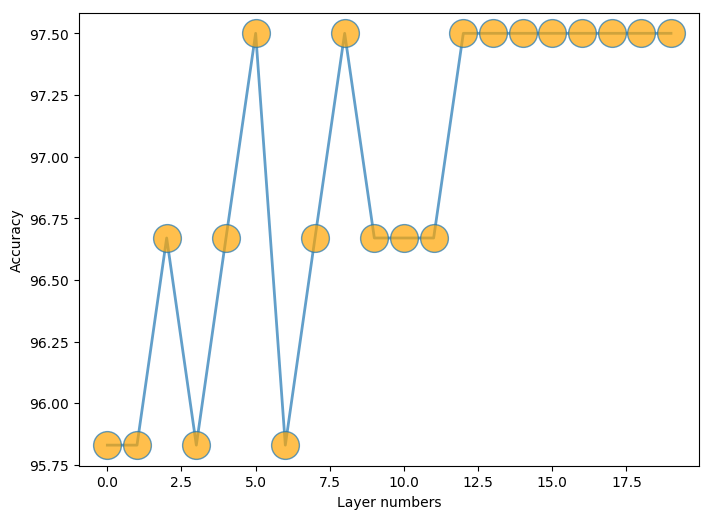

In [30]:
print ("Opt_layer_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Layer numbers')
plt.show()

In [31]:
Accuracy

[95.83,
 95.83,
 96.67,
 95.83,
 96.67,
 97.5,
 95.83,
 96.67,
 97.5,
 96.67,
 96.67,
 96.67,
 97.5,
 97.5,
 97.5,
 97.5,
 97.5,
 97.5,
 97.5,
 97.5]